In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

In [3]:
# call data for hipotesis
data_hipotesis = joblib.load("D:/BOOTCAMP/project/(Block 4) Business Statistik/data_hipotesis.csv")
data_hipotesis.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,Dini Hari,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,Dini Hari,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Preanalysis
holiday = data_hipotesis['Holiday'].unique()
seasons = data_hipotesis['Seasons'].unique()
hour = data_hipotesis['Hour'].unique()

In [5]:
# show categorical
holiday, seasons, hour

(array(['No Holiday', 'Holiday'], dtype=object),
 array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object),
 array(['Dini Hari', 'Pagi Hari', 'Siang Hari', 'Malam Hari'], dtype=object))

In [6]:
def hipotesis(column_1, column_2, input_1, input_2, equal):
    """
    Function for hipotesis test (one tail): input column H0 & H1
    (column_1 = categorical, column_2 = numerical)
    and then input categoric values from  column_1
    """
    
    # Categorical 1
    data_group1 = data_hipotesis[data_hipotesis[column_1]==input_1][column_2].values
    # Categorical 2
    data_group2 = data_hipotesis[data_hipotesis[column_1]==input_2][column_2].values
    result = stats.ttest_ind(a = data_group1, 
                         b = data_group2, 
                         equal_var=False, 
                         alternative = equal)
    
    dof = len(data_group1)+len(data_group2)-2
    print(f'Nilai DOF adalah {dof}')
    print(f'Nilai statistic adalah {result.statistic}')
    
    # determain term of desicion
    if result.pvalue<0.05:
        print("Reject the null hypothesis")
    else:
        print("Failed to reject the Null hypothesis")
        
    return data_group1, data_group2

In [33]:
# call function for look result hipotesis with Rented Bike Count column
holiday_rent = hipotesis(column_1 = 'Holiday',column_2 = 'Rented Bike Count',input_1 = 'Holiday',input_2 = 'No Holiday',equal = "greater" )
seasons_rent1 = hipotesis(column_1 = 'Seasons',column_2 = 'Rented Bike Count',input_1 = 'Winter',input_2 = 'Autumn',equal = "greater" )
season_rent2 = hipotesis(column_1 = 'Seasons',column_2 = 'Rented Bike Count',input_1 = 'Summer',input_2 = 'Spring',equal = "greater" )
hour_rent1 = hipotesis(column_1 = 'Hour',column_2 = 'Rented Bike Count',input_1 = 'Dini Hari',input_2 = 'Pagi Hari',equal = "greater" )
hour_rent2 = hipotesis(column_1 = 'Hour',column_2 = 'Rented Bike Count',input_1 = 'Siang Hari',input_2 = 'Pagi Hari',equal = "greater" )

print(">>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<")

# call function for look result hipotesis with Rainfall(mm) column
holiday_rain = hipotesis(column_1 = 'Holiday',column_2 = 'Rainfall(mm)',input_1 = 'Holiday',input_2 = 'No Holiday',equal = "greater" )
seasons_rain1 = hipotesis(column_1 = 'Seasons',column_2 = 'Rainfall(mm)',input_1 = 'Winter',input_2 = 'Autumn',equal = "greater" )
season_rain2 = hipotesis(column_1 = 'Seasons',column_2 = 'Rainfall(mm)',input_1 = 'Summer',input_2 = 'Spring',equal = "greater" )
hour_rain1 = hipotesis(column_1 = 'Hour',column_2 = 'Rainfall(mm)',input_1 = 'Dini Hari',input_2 = 'Pagi Hari',equal = "greater" )
hour_rain2 = hipotesis(column_1 = 'Hour',column_2 = 'Rainfall(mm)',input_1 = 'Siang Hari',input_2 = 'Pagi Hari',equal = "greater" )


# reject H0 : 3 , 5 <> 3

Nilai DOF adalah 8758
Nilai statistic adalah -7.5973291340447595
Failed to reject the Null hypothesis
Nilai DOF adalah 4342
Nilai statistic adalah -41.534556931784834
Failed to reject the Null hypothesis
Nilai DOF adalah 4414
Nilai statistic adalah 15.381558903510568
Reject the null hypothesis
Nilai DOF adalah 4743
Nilai statistic adalah -32.693134962632115
Failed to reject the Null hypothesis
Nilai DOF adalah 4378
Nilai statistic adalah 15.814809940377986
Reject the null hypothesis
>>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<
Nilai DOF adalah 8758
Nilai statistic adalah -2.320983308332195
Failed to reject the Null hypothesis
Nilai DOF adalah 4342
Nilai statistic adalah -4.048855112531602
Failed to reject the Null hypothesis
Nilai DOF adalah 4414
Nilai statistic adalah 1.666478305709935
Reject the null hypothesis
Nilai DOF adalah 4743
Nilai statistic adalah -1.9429427634321705
Failed to reject the Null hypothesis
Nilai DOF adalah 4378
Nilai statistic adalah -0.914840019430488
Faile

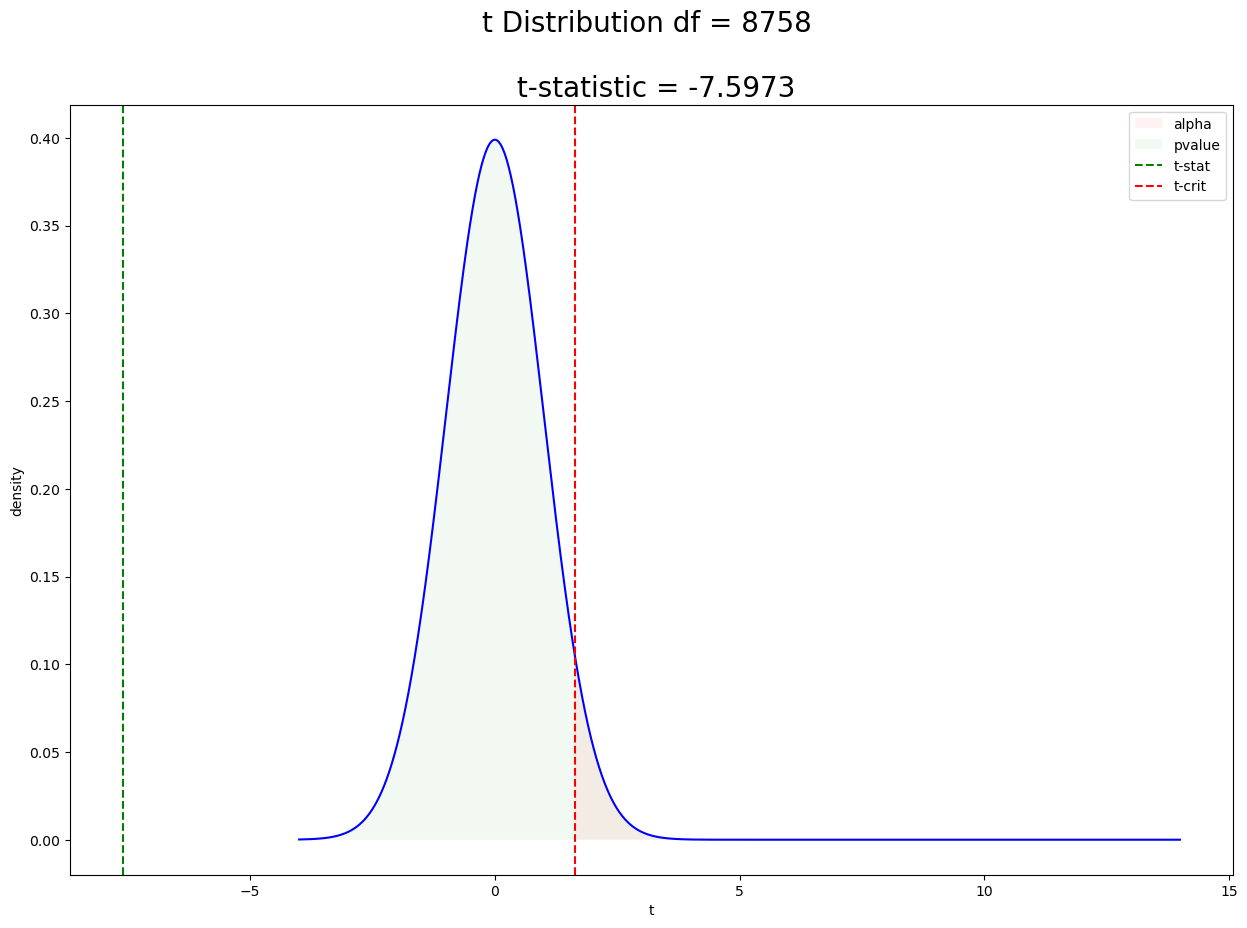

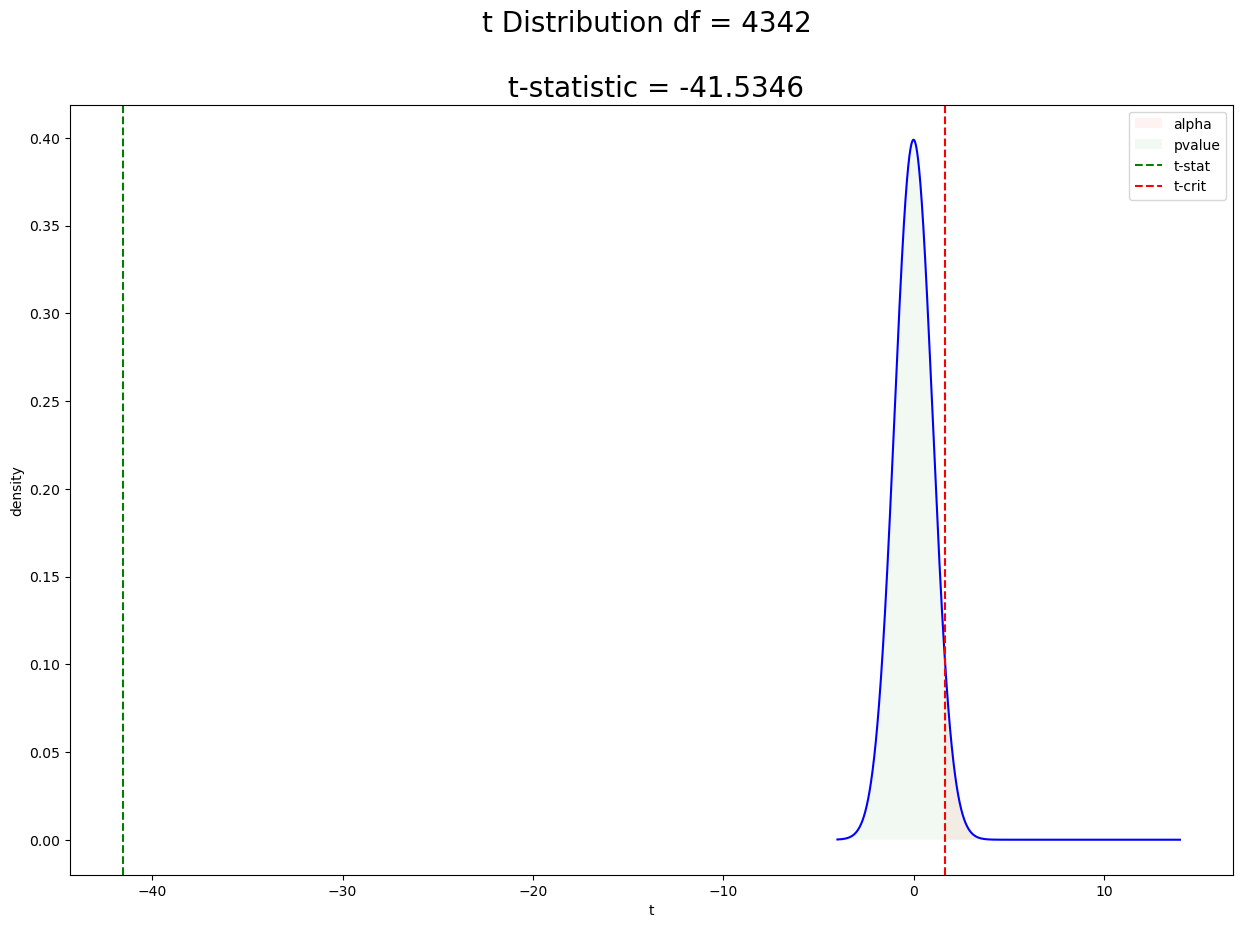

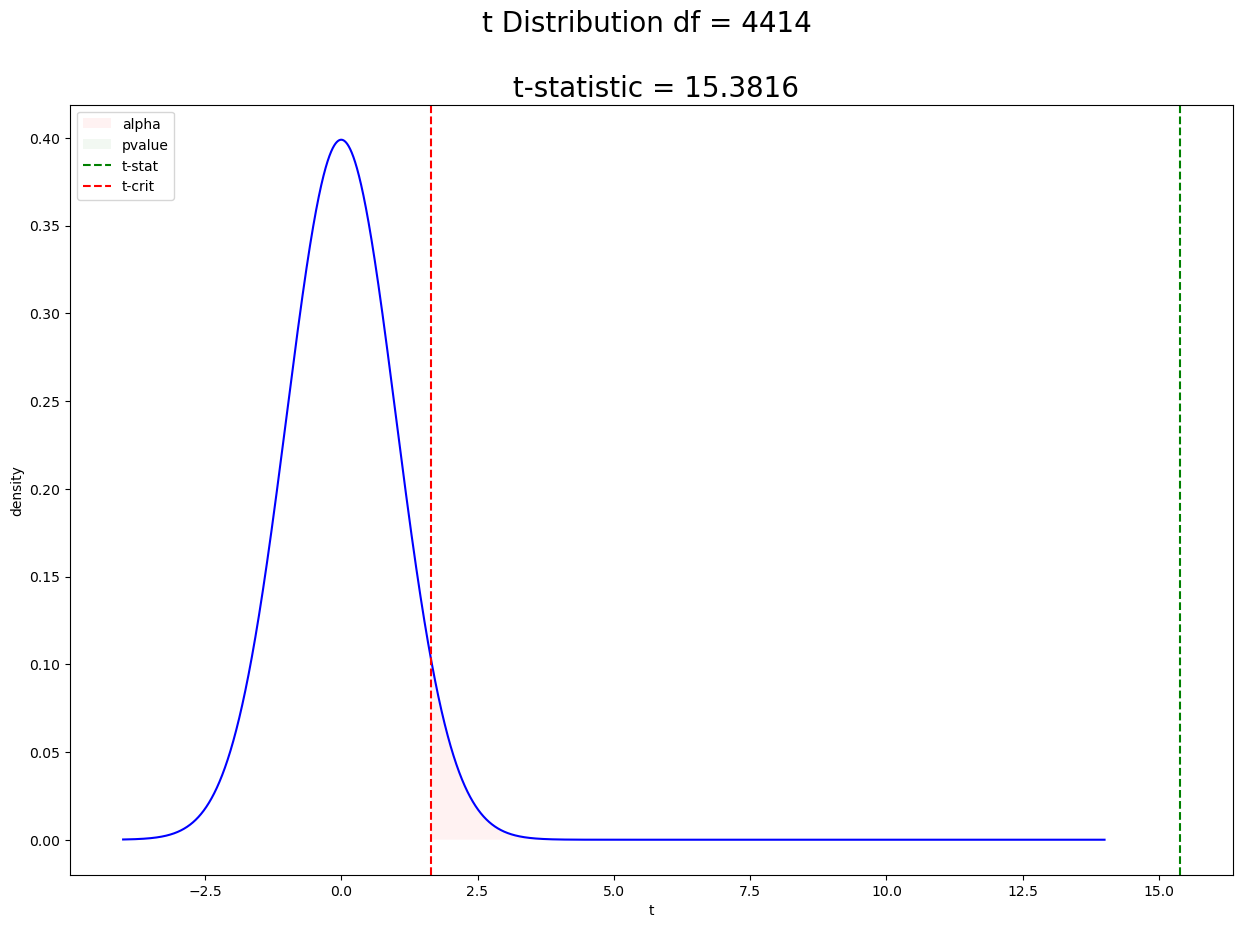

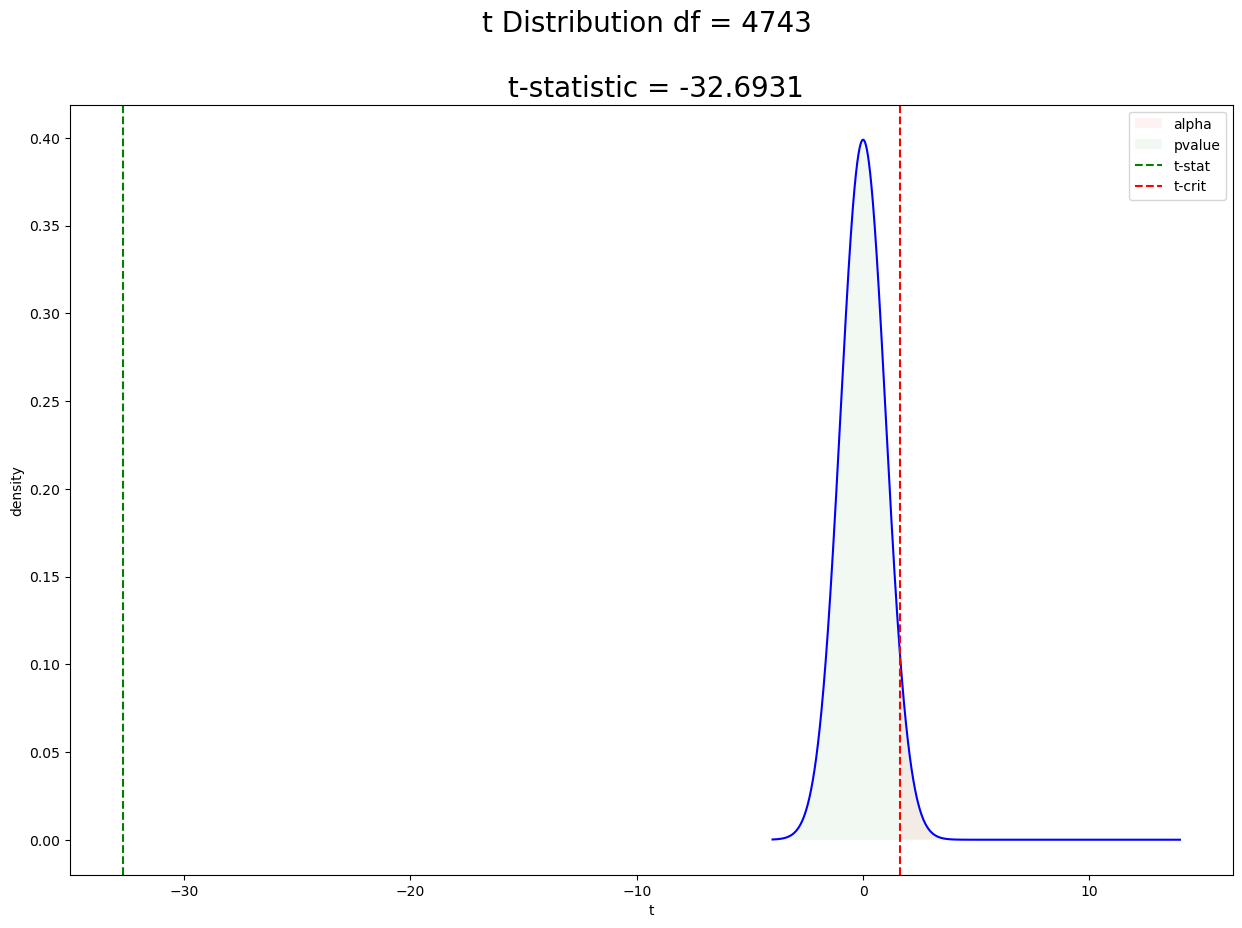

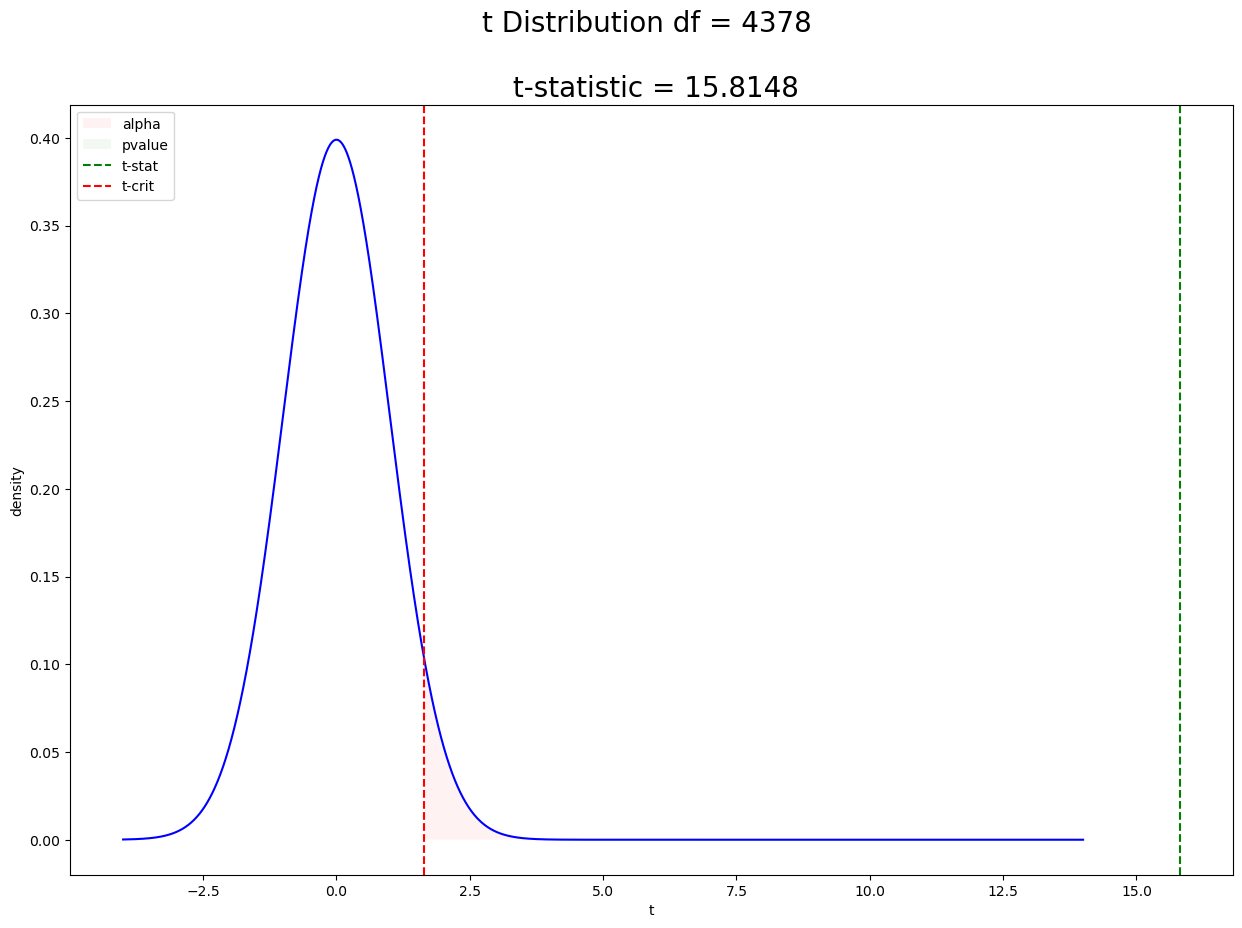

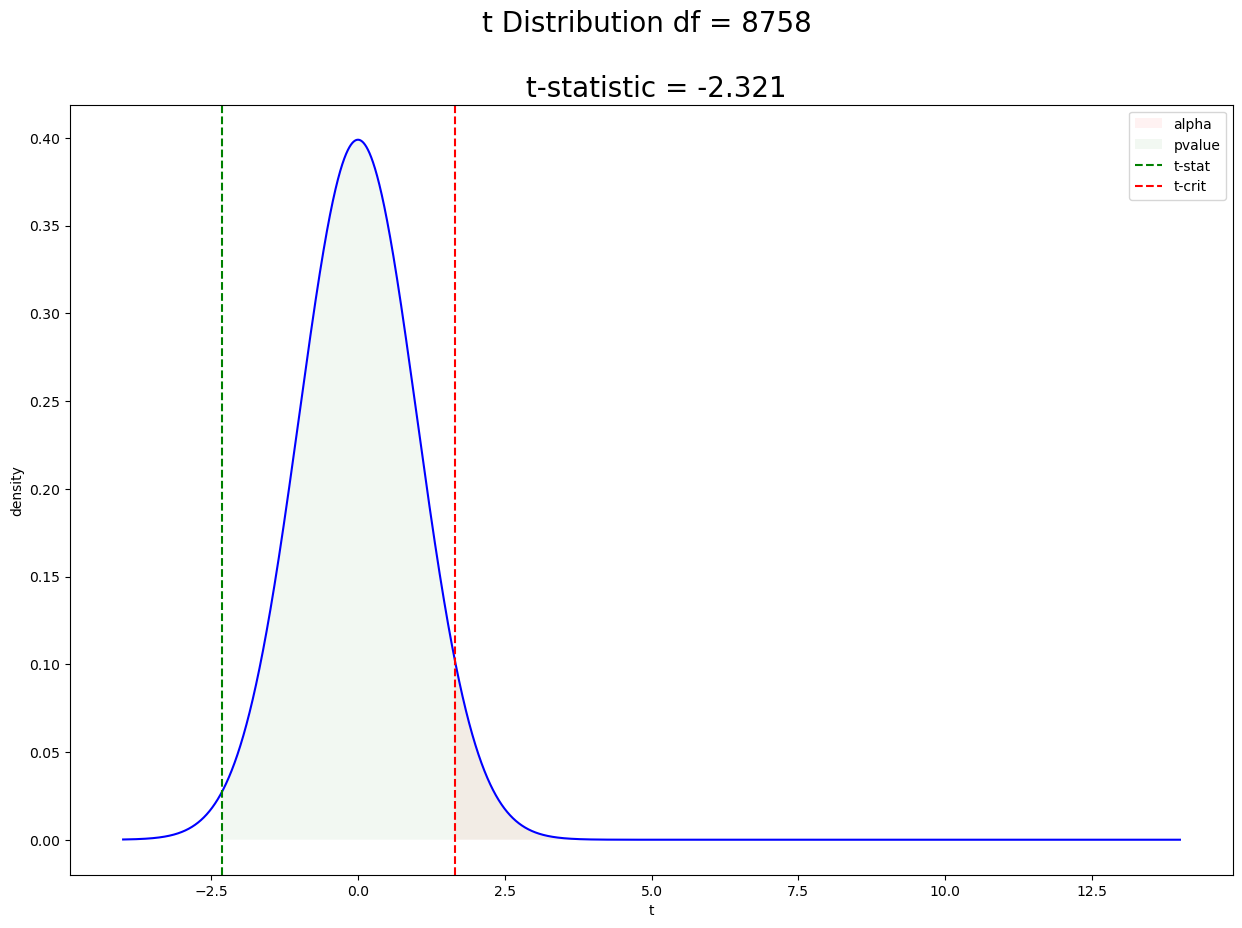

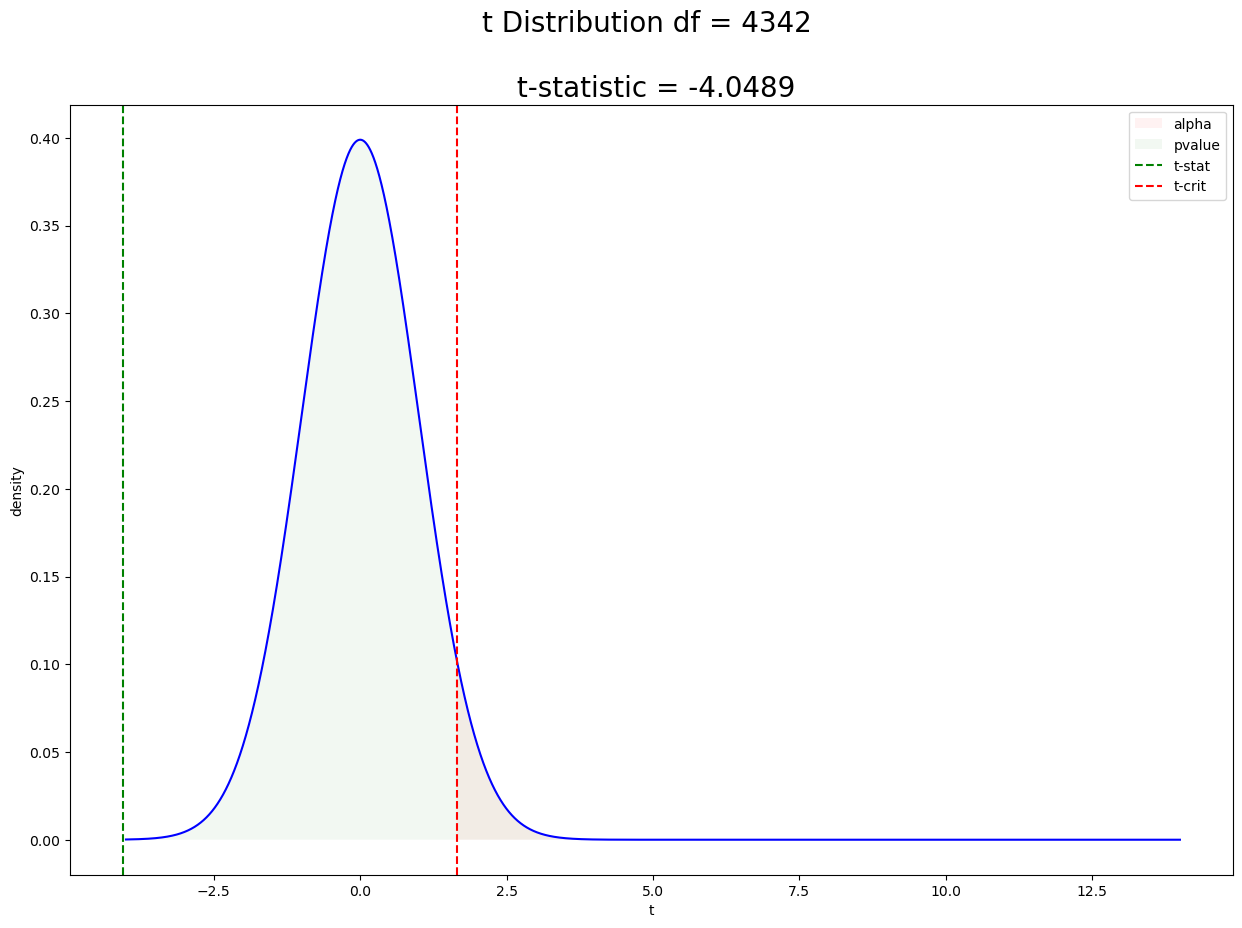

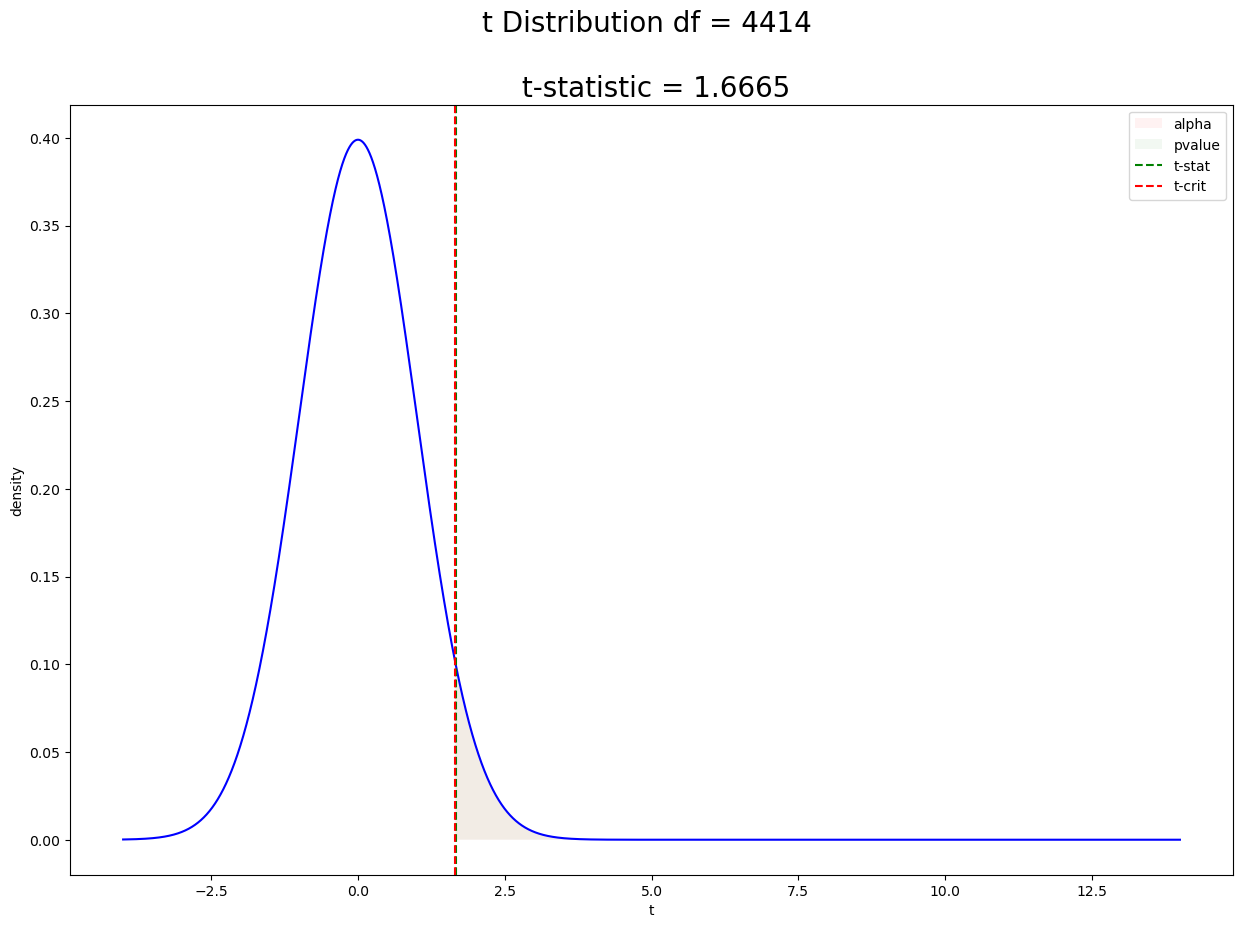

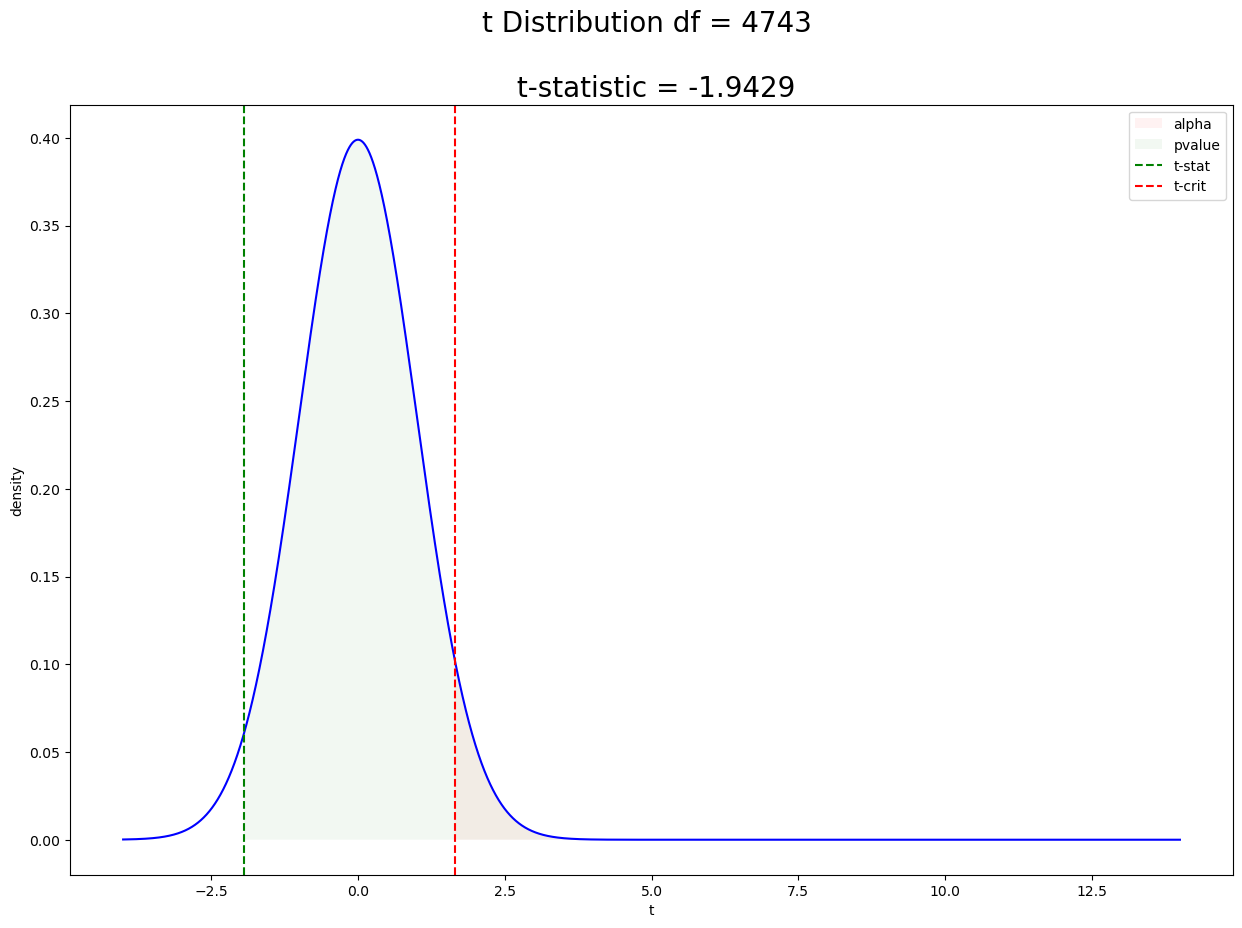

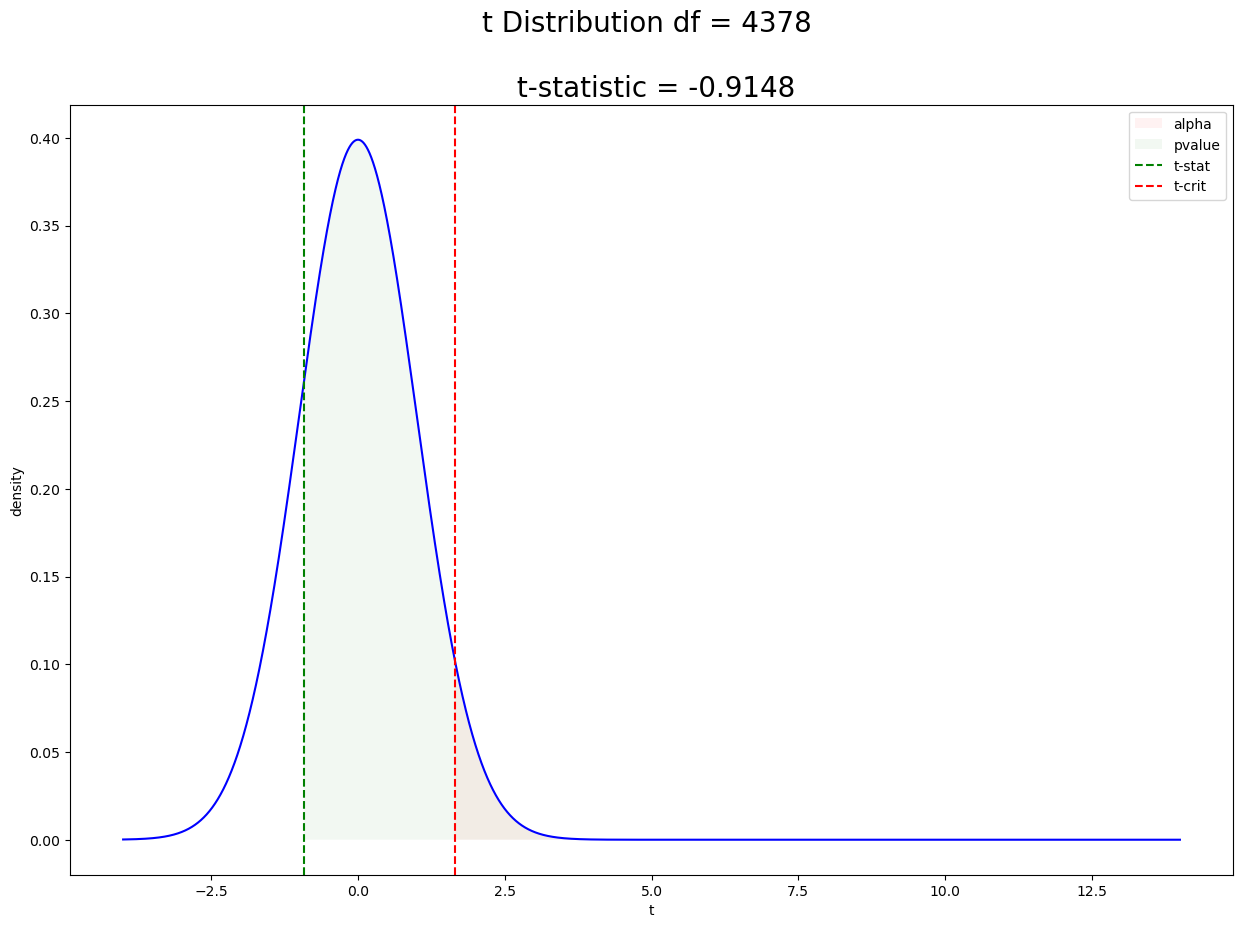

In [36]:
# rent
holiday_rent = visualization(8758,-7.5973291340447595)
seasons_rent1 = visualization(4342, -41.534556931784834)
season_rent2 = visualization(4414, 15.381558903510568)
hour_rent1 = visualization(4743, -32.693134962632115)
hour_rent2 = visualization(4378, 15.814809940377986)

# rain
holiday_rain = visualization(8758 , -2.320983308332195)
seasons_rain1 = visualization(4342, -4.048855112531602)
season_rain2 = visualization(4414, 1.666478305709935)
hour_rain1 = visualization(4743 , -1.9429427634321705)
hour_rain2 = visualization(4378 , -0.914840019430488)

In [8]:
def visualization (dof , statistic):
    """ 
    this function for see hipotesis test, input data
    dof and statistic value from each function hipotesis
    and make alpha is 0.05.
    """
    fig = plt.subplots(figsize=(15, 10)) # make size fig
    
    # plot sample distribution 
    x = np.arange(-4, 14, 0.001)
    plt.plot(x, stats.t.pdf(x, df = dof), 
             color='blue')

    # plot alpha region
    x_alpha = np.arange(stats.t.ppf(1-0.05, df = dof), 4, 0.01)
    y_alpha = stats.t.pdf(x_alpha, df = dof)
    plt.fill_between(x = x_alpha, 
                     y1 = y_alpha,
                     facecolor = 'red',
                     alpha = 0.05, 
                     label = 'alpha')

    # plot pvalue
    x_pvalue = np.arange(statistic, 4, 0.01)
    y_pvalue = stats.t.pdf(x_pvalue, df = dof)

    plt.fill_between(x = x_pvalue, 
                     y1 = y_pvalue,
                     facecolor = 'green',
                     alpha = 0.05, 
                     label = 'pvalue')

    # plot t-crit and t-stats
    plt.axvline(np.round(statistic, 4), 
                color ="green", 
                linestyle = "--", 
                label ="t-stat")

    t_crit = np.round(stats.t.ppf(1-0.05, df = 8758), 4)
    plt.axvline(t_crit, 
                color ="red", 
                linestyle = "--", 
                label ="t-crit")
    

    plt.legend()
    plt.xlabel("t")
    plt.ylabel("density")


    plt.title(f't Distribution df = {dof} \n\n t-statistic = {np.round(statistic, 4)}',size = 20);

In [48]:
def Confidence_Interval(column_1, column_2, input_1, input_2):
    """
    Function for check confident interval
    input two columns and category variable 
    """
    cm = CompareMeans(d1 = DescrStatsW(data=data_hipotesis[data_hipotesis[column_1]==input_1][column_2].values), 
                      d2 = DescrStatsW(data=data_hipotesis[data_hipotesis[column_1]==input_2][column_2].values))

    upper, lower = cm.tconfint_diff(alpha=0.05, 
                                    alternative='two-sided', 
                                    usevar='unequal')

    print("Confidence Interval", ":", "[", abs(lower),",",abs(upper), "]")

In [51]:
# call function for look result hipotesis with Rented Bike Count column
holiday_rent = Confidence_Interval(column_1 = 'Holiday',column_2 = 'Rented Bike Count',input_1 = 'Holiday',input_2 = 'No Holiday')
seasons_rent1 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Rented Bike Count',input_1 = 'Winter',input_2 = 'Autumn')
season_rent2 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Rented Bike Count',input_1 = 'Summer',input_2 = 'Spring' )
hour_rent1 = Confidence_Interval(column_1 = 'Hour',column_2 = 'Rented Bike Count',input_1 = 'Dini Hari',input_2 = 'Pagi Hari')
hour_rent2 = Confidence_Interval(column_1 = 'Hour',column_2 = 'Rented Bike Count',input_1 = 'Siang Hari',input_2 = 'Pagi Hari')

print(">>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<")
# call function for look result hipotesis with Rainfall(mm) column
holiday_rain = Confidence_Interval(column_1 = 'Holiday',column_2 = 'Rainfall(mm)',input_1 = 'Holiday',input_2 = 'No Holiday' )
seasons_rain1 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Rainfall(mm)',input_1 = 'Winter',input_2 = 'Autumn' )
season_rain2 = Confidence_Interval(column_1 = 'Seasons',column_2 = 'Rainfall(mm)',input_1 = 'Summer',input_2 = 'Spring' )
hour_rain1 = Confidence_Interval(column_1 = 'Hour',column_2 = 'Rainfall(mm)',input_1 = 'Dini Hari',input_2 = 'Pagi Hari' )
hour_rain2 = Confidence_Interval(column_1 = 'Hour',column_2 = 'Rainfall(mm)',input_1 = 'Siang Hari',input_2 = 'Pagi Hari' )

Confidence Interval : [ 159.746133606065 , 271.196029378245 ]
Confidence Interval : [ 566.0099415857918 , 622.1036217027716 ]
Confidence Interval : [ 342.7948131563322 , 265.28942597410276 ]
Confidence Interval : [ 368.83909624392425 , 415.90258673063545 ]
Confidence Interval : [ 336.7246549298231 , 262.44520808387557 ]
>>>>>>>>>>>>>>>>>>> SPACE <<<<<<<<<<<<<<<<<<<<<<
Confidence Interval : [ 0.011437403528371165 , 0.13725109044110262 ]
Confidence Interval : [ 0.04638060024875242 , 0.13348407211591995 ]
Confidence Interval : [ 0.15367289729463027 , 0.012459129178688216 ]
Confidence Interval : [ 0.0005180421777994382 , 0.1146993859481843 ]
Confidence Interval : [ 0.03783932108152076 , 0.10404936674362124 ]


Based on the result, we can 95% confident that the average difference